In [1]:
exec (open("/Users/pvmarkov/dengue/scripts/functions2.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"
#getting_cover_ntfreqs ("/Users/pvmarkov/dengue/data/merged_twoway_kass_rehead_sorted.bam", "/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv", True, False, False)

In [13]:
counts_dataframe_merged = pd.read_csv ("/Users/pvmarkov/dengue/data/indels_by_position_with_mergeddatakass_seqqualON_alignqualON_pairsOFF.csv")
counts_dataframe_separate = pd.read_csv ("/Users/pvmarkov/dengue/data/indels_by_position_with_nonmerged_two_way_data_2run_seqqualOFF_alignqualOFF_pairsOFF.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
#print (correction)


16138


In [20]:
print (counts_dataframe_separate.describe ())
print (counts_dataframe_merged.describe ())

         Unnamed: 0             As             Cs             Gs  \
count  10718.000000   10718.000000   10718.000000   10718.000000   
mean    5358.500000   51289.940940   32373.200317   39295.475182   
std     3094.164427   75382.246095   65000.408954   69408.922030   
min        0.000000       0.000000       0.000000       0.000000   
25%     2679.250000     195.000000     121.000000      75.000000   
50%     5358.500000     534.000000     343.000000     135.000000   
75%     8037.750000  134751.250000     755.000000   68485.750000   
max    10717.000000  272437.000000  273597.000000  269730.000000   

                 Ns             Ts       coverage  expected_number_of_errors  \
count  10718.000000   10718.000000   10718.000000               10718.000000   
mean       0.000187   32347.834484  155306.451110                 280.118646   
std        0.013660   64597.815961   35919.825944                 130.630345   
min        0.000000       0.000000       1.000000                  

In [14]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


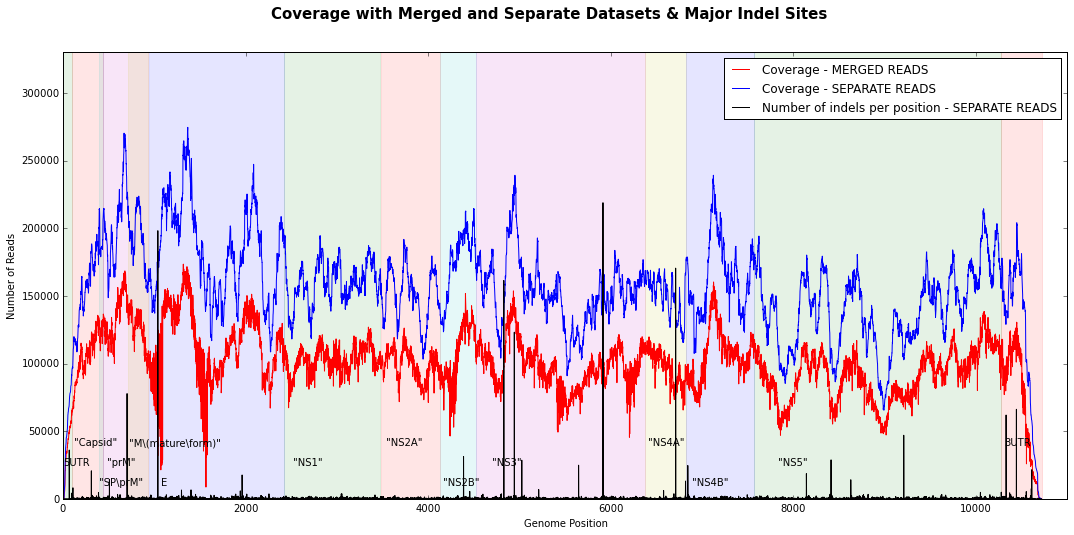

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Coverage with Merged and Separate Datasets & Major Indel Sites', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_merged ['position'], counts_dataframe_merged ['coverage'], 'r-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_separate ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_separate ['position'], 10*counts_dataframe_separate ['number_of_indels_by_position'], 'k-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Coverage - MERGED READS', 'Coverage - SEPARATE READS', 'Number of indels per position - SEPARATE READS'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 330000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

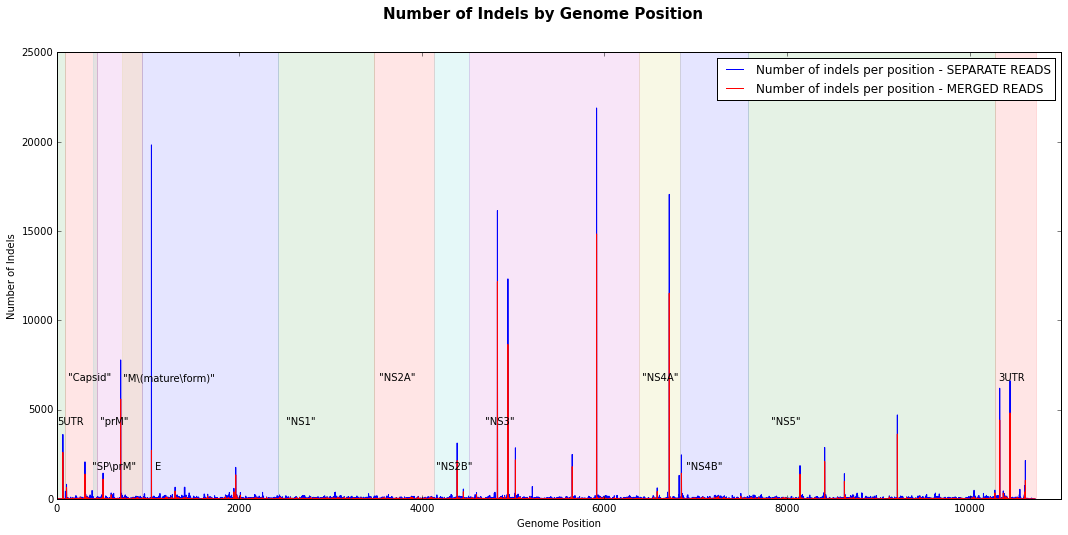

In [19]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Number of Indels by Genome Position', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_separate ['position'], counts_dataframe_separate ['number_of_indels_by_position'], 'b-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_merged ['position'], counts_dataframe_merged ['number_of_indels_by_position'], 'r-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Indels')
fig_size = rcParams["figure.figsize"]
plt.legend (['Number of indels per position - SEPARATE READS', 'Number of indels per position - MERGED READS'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 25000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_upper_limit/15 + ((axis_upper_limit/10) *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

In [50]:
max(counts_dataframe ['number_of_indels_by_position'])
pos = range(counts_dataframe ['number_of_indels_by_position'].argmax()-10,counts_dataframe ['number_of_indels_by_position'].argmax()+10)
for i in pos:
    print (counts_dataframe ['majorsequence'][i])

    
pos2 = counts_dataframe['position'] [(counts_dataframe['number_of_indels_by_position'] > 1000)]   
print(pos2)
for j in pos2:
    pos = range (j-5, j+10)
    for i in pos:
        if i == j:
            print ("-------")
        print (counts_dataframe ['majorsequence'][i])
    print ("#######")
#print(counts_dataframe ['majorsequence'][counts_dataframe['number_of_indels_by_position'] > 1000])

g
g
a
a
g
a
a
a
t
c
c
a
a
a
a
a
a
t
g
a
69          69
311        311
509        509
702        702
1039      1039
1962      1962
4387      4387
4828      4828
4943      4943
5025      5025
5647      5647
5914      5914
6710      6710
6843      6843
8142      8142
8412      8412
9208      9208
10329    10329
10442    10442
10610    10610
Name: position, dtype: int64
t
a
a
c
a
-------
g
t
t
t
t
t
t
a
a
t
#######
a
c
a
a
t
-------
t
a
a
a
a
a
a
t
c
a
#######
c
t
t
c
t
-------
g
t
t
t
a
a
a
a
c
a
#######
g
a
a
g
a
-------
g
a
a
a
a
a
a
g
a
t
#######
g
a
t
g
g
-------
c
a
a
a
a
a
a
c
a
a
#######
a
t
t
t
g
-------
g
a
a
a
a
a
a
g
a
c
#######
g
t
c
g
a
-------
t
a
a
a
a
a
a
c
g
a
#######
g
c
c
t
g
-------
g
a
a
a
a
a
a
t
c
c
#######
a
t
c
g
a
-------
c
a
a
a
a
a
a
g
g
a
#######
a
g
a
c
t
-------
g
a
a
a
a
a
a
g
t
a
#######
c
c
t
g
a
-------
g
a
a
a
a
a
a
t
g
g
#######
a
a
a
t
c
-------
c
a
a
a
a
a
a
t
g
a
#######
c
t
g
g
a
-------
g
t
t
t
t
t
t
c
t
c
#######
t
c
c
t
g
-------
g
a
a
a
a
a
a
c

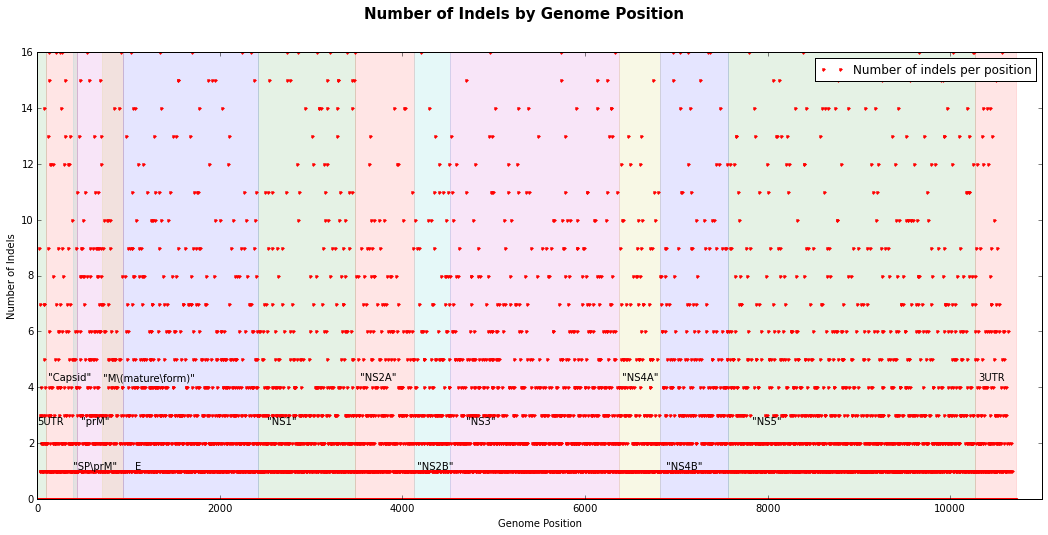

In [51]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Number of Indels by Genome Position', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['number_of_indels_by_position'], 'r.') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Indels')
fig_size = rcParams["figure.figsize"]
plt.legend (['Number of indels per position'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 16
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_upper_limit/15 + ((axis_upper_limit/10) *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)